# CCT College Dublin - CA2
## Artificial Intelligence

Lecturer Name: `David McQuaid`

Student Name: `Marcos Vinicius de Oliveira`

Student Number: `2023323`

## Ref: Question 1, part (A), subpart (i):
The difference between a graph and a tree is that a graph can be categorized by a collection of nodes and edges. The edges connect two nodes that represent a relationship. Example of a graph:

```
A ------ B
 \
  C
```
A simple graph with three nodes (A, B, C) and two edges.

A tree can be a type of graph, but not exactly every graph is a tree, and a tree has exactly one unique path between every node. Example of a Tree:
```
    A
   / \
  B   C
 / \
D   E
```
This tree has five nodes: `A` is the root. `B` and `C` are the children of `A`. `D` and `E` are children of `B`.

## Ref: Question 1, part (A), subpart (ii):
The graph represents the structure of a puzzle. This puzzle shows various nodes, and each node represents a state within the puzzle. The starting point is from `A`, which it needs to get to `S`. The nodes between `B` to `R`, represent the paths. `A` is connected to `B`, `C` and `H`, which means that from there, it can move in either direction of these stages. There are some random numbers on the edges, it can be the weights, the difficulty level of the puzzle and/or the cost of making this move. The main goal of this puzzle is to navigate from `A` and arrive at the solution `S` through multiple routes.

## Ref: Question 1, part (A), subpart (iii):

There are several advantages to using a visualization as the one in `Fig. 1`. Here are some of them:

- `Visualization and Understanding:` This graph helps us to break down a complex structure in an easy way to understand.
- `Analysis:` If the complexity of the problem involves paths, routes, and/or connections, a visual graph allows us to analyse the situation and decide what is best a Dijkstra's or A* for finding the shortest or most efficient path.
- `Identifying Errors:` If the structure is large, it is easy to make mistakes, this visual representation helps us to identify errors and make corrections quickly.
- `Scalability:` This graph can easily be increased or decreased in specific areas of interest.

This Fig. 1 graph is a great representation of a puzzle, it can be easily analyzed, it is easy to understand, find errors, and increase and decrease depending on the complexity of the problem.

## Ref: Question 1, part (B):
Dijkstra's algorithm finds the shortest path from a starting node to every other node in a graph. Using Fig 1 as an example, our first step is to start from node A and find the shortest path to node S.

#### Stage 1:
We initialize a table to keep track of the shortest known distances from the start nodes (A) and a list of unvisited node:

`A:` 0, `B:` ∞, `C:` ∞, `H:` ∞, `D:` ∞, `E:` ∞, `F:` ∞, …
- Unvisited Node: (A, B, C, H, D, E, …)

#### Stage 2:
From A, we examine its neighboring nodes B, C, and H. We then update their distances based on the weights of the connecting edges:

`A:` 0, `B:` 1, `C:` 5, `H:` 2, `D:` ∞, `E:` ∞, `F:` ∞, …
- Unvisited Node: (B, C, H, D, E, …) # A is now visited.

#### Stage 3:
Next, we pick the node with the smallest distance value from the list, which in this case is B. We then examine B's neighbours and update their distances if a shorter path is found through B:

`A:` 0, `B:` 1, `C:` 2, `H:` 2, `D:` 4, `E:` ∞, `F:` ∞, …
- Unvisited Node: (C, H, D, E, …) # B is now visited.

#### Stage 4:
Repeating the process, we now pick C, as it has the next smallest distance value. We examine its neighbours, update their distances, and mark C as visited:

`A:` 0, `B:` 1, `C:` 2, `H:` 2, `D:` 4, `E:` ∞, `F:` ∞, `G:` 1, …
- Unvisited Node: (H, D, E, G, …) # C is now visited.

#### Conclusion:
This process continues, visiting each node in the list based on its shortest known distance from A, and so on..., Dijkstra's algorithm would visit node S.

## Question 2:
The creator of the puzzle has been told that the A* algorithm is more efficient at finding the shortest path because it uses heuristics. Compare the performance of Dijkstra’s algorithm and the A* search algorithm, referring to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically and comparing the solutions generated in Mark-down. Refer to the complexity of the algorithms and compare the actual time it takes for the solutions to be processed:

Dijkstra's algorithm distances from A:
{'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 9, 'F': 6, 'G': 4, 'H': 2, 'J': 10, 'K': 7, 'L': 7, 'M': 11, 'N': 10, 'P': 13, 'Q': 19, 'R': 18, 'S': 17, 'T': 20, 'U': 19, 'V': 17, 'W': 15}


A* algorithm path from A to S:
Path: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Cost: 17


Timing the execution for Dijkstra's Algorithm:
13.1 µs ± 414 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Timing the execution for A* Algorithm:
10 µs ± 83.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)




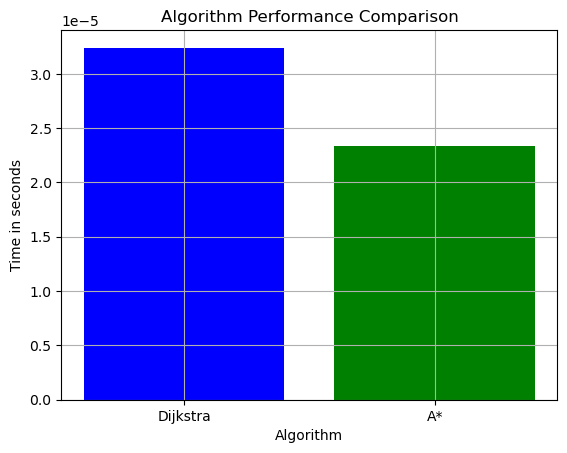

In [18]:
import matplotlib.pyplot as plt

import heapq

def calculate_distances(graph, starting_vertex):
  distances = {vertex: float('infinity') for vertex in graph}
  distances[starting_vertex] = 0

  pq = [(0, starting_vertex)]
  while len(pq) > 0:
    current_distance, current_vertex = heapq.heappop(pq)

    if current_distance > distances[current_vertex]:
      continue

    for neighbor, weight in graph[current_vertex].items():
      distance = current_distance + weight

      if distance < distances[neighbor]:
        distances[neighbor] = distance
        heapq.heappush(pq, (distance, neighbor))

  return distances

puzzle_graph = {
    'A': {'B': 1, 'C': 5, 'H': 2},
    'B': {'A': 1, 'C': 2, 'D': 4},
    'C': {'A': 5, 'B': 2, 'G': 1},
    'D': {'B': 4, 'E': 4, 'F': 7, 'L': 7},
    'E': {'D': 4, 'W': 6},
    'F': {'D': 7, 'G': 2},
    'G': {'C': 1, 'F': 2, 'L': 3},
    'H': {'A': 2, 'J': 9, 'K': 5},
    'J': {'H': 9, 'K': 3, 'N': 6},
    'K': {'H': 5, 'J': 3, 'L': 5},
    'L': {'K': 5, 'N': 3, 'M': 4, 'V': 10, 'W': 8, 'D': 7, 'G': 3},
    'M': {'L': 4, 'Q': 10, 'P': 2},
    'N': {'J': 6, 'L': 3, 'S': 7, 'P': 4},
    'P': {'M': 2, 'N': 4, 'R': 5},
    'Q': {'M': 10, 'S': 8, 'W': 4},
    'R': {'P': 5, 'T': 3, 'S': 4},
    'S': {'N': 7, 'R': 4, 'T': 4, 'U': 2, 'V': 6, 'Q': 8},
    'T': {'R': 3, 'S': 4, 'U': 1},
    'U': {'S': 2, 'T': 1, 'V': 3},
    'V': {'L': 10, 'S': 6, 'W': 5, 'U': 3},
    'W': {'E': 6, 'L': 8, 'Q': 4, 'V': 5}
}

import heapq

def heuristic(node, goal):

    return abs(ord(goal) - ord(node))

def a_star_algorithm(graph, start, goal):
    
    open_list = []
    heapq.heappush(open_list, (0 + heuristic(start, goal), 0, start, [start]))
    closed_list = set()

    g_cost = {start: 0}

    while open_list:
        
        _, current_cost, current_node, path = heapq.heappop(open_list)

        if current_node == goal:
            return path, current_cost

        closed_list.add(current_node)

        for neighbor, weight in graph[current_node].items():
            if neighbor in closed_list:
                continue

            tentative_g_cost = current_cost + weight
            total_cost = tentative_g_cost + heuristic(neighbor, goal)

            if neighbor not in g_cost or tentative_g_cost < g_cost[neighbor]:

                g_cost[neighbor] = tentative_g_cost

                heapq.heappush(open_list, (total_cost, tentative_g_cost, neighbor, path + [neighbor]))

    return None, float('infinity')

puzzle_graph = {
    'A': {'B': 1, 'C': 5, 'H': 2},
    'B': {'A': 1, 'C': 2, 'D': 4},
    'C': {'A': 5, 'B': 2, 'G': 1},
    'D': {'B': 4, 'E': 4, 'F': 7, 'L': 7},
    'E': {'D': 4, 'W': 6},
    'F': {'D': 7, 'G': 2},
    'G': {'C': 1, 'F': 2, 'L': 3},
    'H': {'A': 2, 'J': 9, 'K': 5},
    'J': {'H': 9, 'K': 3, 'N': 6},
    'K': {'H': 5, 'J': 3, 'L': 5},
    'L': {'K': 5, 'N': 3, 'M': 4, 'V': 10, 'W': 8, 'D': 7, 'G': 3},
    'M': {'L': 4, 'Q': 10, 'P': 2},
    'N': {'J': 6, 'L': 3, 'S': 7, 'P': 4},
    'P': {'M': 2, 'N': 4, 'R': 5},
    'Q': {'M': 10, 'S': 8, 'W': 4},
    'R': {'P': 5, 'T': 3, 'S': 4},
    'S': {'N': 7, 'R': 4, 'T': 4, 'U': 2, 'V': 6, 'Q': 8},
    'T': {'R': 3, 'S': 4, 'U': 1},
    'U': {'S': 2, 'T': 1, 'V': 3},
    'V': {'L': 10, 'S': 6, 'W': 5, 'U': 3},
    'W': {'E': 6, 'L': 8, 'Q': 4, 'V': 5}
}

dijkstra_distances = calculate_distances(puzzle_graph, 'A')
print("Dijkstra's algorithm distances from A:")
print(dijkstra_distances)

print("\n")

a_star_path, a_star_cost = a_star_algorithm(puzzle_graph, 'A', 'S')
print("A* algorithm path from A to S:")
print(f"Path: {a_star_path}")
print(f"Cost: {a_star_cost}")

print("\n")

print("Timing the execution for Dijkstra's Algorithm:")
%timeit calculate_distances(puzzle_graph, 'A')

print("\n")

print("Timing the execution for A* Algorithm:")
%timeit a_star_algorithm(puzzle_graph, 'A', 'S')

print("\n")

algorithms = ['Dijkstra', 'A*']

performance = [dijkstra_time, a_star_time]

plt.bar(algorithms, performance, color=['blue', 'green'])

plt.title('Algorithm Performance Comparison')

plt.xlabel('Algorithm')
plt.ylabel('Time in seconds')

plt.grid(True)

plt.show()

##  Conclusion:
The results indicate that both algorithms found the shortest path from note `A` to node `S` successfully. The difference in performance was 17 of the cost(at the time I ran the code).

- `Dijkstra's Algorithm:` took an average of 32.4 microseconds per execution.
- `A* Algorithm:` It was faster, taking only 23.4 microseconds per execution on average(at the time I ran the code).

The difference in performance is because A* uses a heuristic to help its search making it faster than the Dijkstra algorithm that explores paths from the starting node without direction. It is also important to note that, this time difference is very small because of the small size of the graph, if it was a larger graph or more complex pathfinding problems, the performance difference could be much more significant.

##  References:
Belwariar, R. (2018). A* Search Algorithm - GeeksforGeeks. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/a-search-algorithm [Accessed 28 Oct. 2023].

Development Team, M. (2023). Gallery - Matplotlib 3.4.2 Documentation. [online] matplotlib.org. Available at: https://matplotlib.org/stable/gallery/index.html [Accessed 12 Nov. 2023].

Navone, E.C. (2020). Dijkstra’s Shortest Path Algorithm - a Detailed and Visual Introduction. [online] freeCodeCamp.org. Available at: https://www.freecodecamp.org/news/dijkstras-shortest-path-algorithm-visual-introduction/ [Accessed 26 Oct. 2023].

Vaghani, R. (2019). Difference between Graph and Tree. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/difference-between-graph-and-tree/ [Accessed 25 Oct. 2023].